Модульная домашняя работа №2, анализ данных
=======

Вариант 8

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns

In [117]:
#  Задаем рабочую папку
import os
os.chdir("/Users/adminadministrator/Documents/Институт биоинформатики/статистика/часть 2/Модульное дз 2")


In [118]:
df = pd.read_csv('data_8.csv', index_col=0, sep = ';')

Убедимся, что с самими данными всё хорошо.

In [119]:
df.head(8)

,section,subsection,title,description,start,stop,address,participants
1,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-01-18,2008-01-20,"Россия, Тульская обл. Алексин",40.0
2,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-08,2008-02-10,"Россия, Приморский край Владивосток",30.0
3,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-02-22,2008-02-24,"Россия, Тульская обл. Алексин",50.0
4,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-22,2008-02-24,"Россия, Свердловская обл. Екатеринбург",100.0
5,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-03-01,2008-03-02,"Россия, Пермская обл. Пермь",40.0
6,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-03-07,2008-03-09,"Россия, Пензенская обл. Пенза",50.0
7,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-03-14,2008-03-16,"Россия, Челябинская обл. Челябинск",100.0
8,Авиамодельный спорт,Основной состав,Учебно-тренировочный сбор,"свободнолетающие модели F-1A,B,C",2008-03-20,2008-04-03,"Россия, Кабардино-Балкарская Респ. Нальчик",20.0


In [120]:
df.dtypes

section          object
subsection       object
title            object
description      object
start            object
stop             object
address          object
participants    float64
dtype: object

In [121]:
df.describe()

,participants
count,76576.000000
mean,118.916880
std,499.736802
min,0.000000
25%,16.000000
50%,34.000000
75%,130.000000
max,45000.000000


#### Количество участников и виды деятельности

Как мы можем видеть по данным есть только одна числовая колонка. Посмотрим на неё

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='participants', ylabel='Density'>

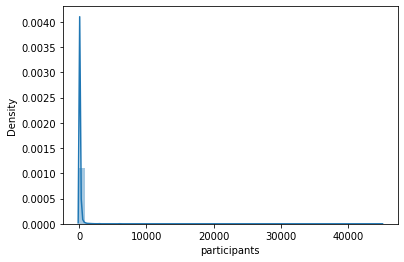

In [122]:
sns.distplot(df['participants'])

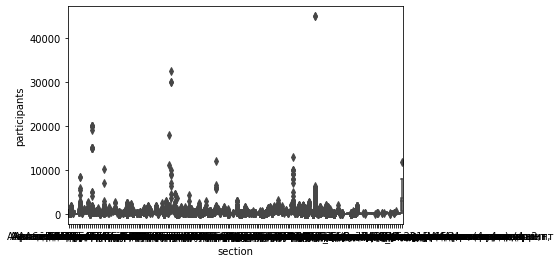

In [123]:
sns.boxplot(x="section", y="participants", data=df, palette='rainbow');

Получили бред. Будем думать дальше. Посмотри на количество секций

In [124]:
df['section'].value_counts()

Автомобильный спорт                                          2787
Спорт лиц с поражением ОДА                                   2469
Фехтование                                                   2253
Мотоциклетный спорт                                          2025
Дзюдо                                                        2022
                                                             ... 
Мас-рестлинг                                                    3
этап_заключительный                                             3
Перетягивание каната                                            3
групповая, акробатика, двоеборье, акробатика групповая 2,       1
радиоориентирование, спортивная радиопеленгация - спринт        1
Name: section, Length: 173, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='section'>

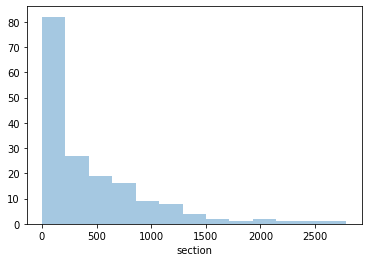

In [125]:
sns.distplot(df['section'].value_counts(), kde=False)

Мы наблюдаем, что есть много секций, по которым проводится малое количество мероприятий. Рассмотрим только те, у которых количество мероприятий больше 1500. Посмотрим на количество участников данных типах мероприятий. 

In [126]:
df['section'].value_counts()[df['section'].value_counts() > 1500]

Автомобильный спорт           2787
Спорт лиц с поражением ОДА    2469
Фехтование                    2253
Мотоциклетный спорт           2025
Дзюдо                         2022
Теннис                        1770
Велоспорт-шоссе               1561
Легкая атлетика               1511
Name: section, dtype: int64

In [127]:
sub_df_1 = df[df['section'] == 'Автомобильный спорт']
sub_df_2 = df[df['section'] == 'Фехтование']
sub_df_3 = df[df['section'] == 'Спорт лиц с поражением ОДА']
sub_df_4 = df[df['section'] == 'Мотоциклетный спорт']
sub_df_5 = df[df['section'] == 'Дзюдо']
sub_df_6 = df[df['section'] == 'Теннис']
sub_df_7 = df[df['section'] == 'Велоспорт-шоссе']
sub_df_8 = df[df['section'] == 'Легкая атлетика']

In [128]:
sub_df = pd.concat([sub_df_1, sub_df_2, sub_df_3, sub_df_4, sub_df_5, sub_df_6, sub_df_7, sub_df_8])

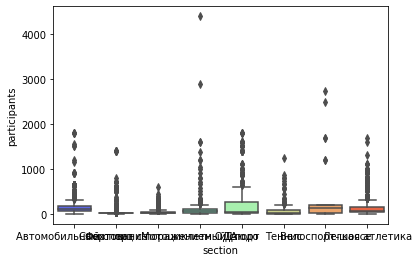

In [129]:
sns.boxplot(x="section", y="participants", data=sub_df, palette='rainbow');

#### Посмотрим на места проведения мероприятий. 

In [130]:
df['address'].value_counts()

Россия, Москва    Москва, -                              3623
Россия, по назначению, -                                 3607
Россия, Московская обл.    Новогорск, УТЦ "Новогорск"    2762
Россия, Московская обл.    Лобня, РОЦ "Оз. Круглое"      1730
Россия, Санкт-Петербург    Санкт-Петербург, -            1353
                                                         ... 
Австрия Финляндия Норвегия Италия, -, -                     1
Финляндия Норвегия Швейцария Словения, -, -                 1
Польша Украина, -, -                                        1
Дания Италия Страны Европы, -, -                            1
Россия, Московская обл.    Реутов, -                        1
Name: address, Length: 2488, dtype: int64

Посмотрим на типы данных. Для проверки корректности прочтения (а то вдруг как строка считались числа)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='address'>

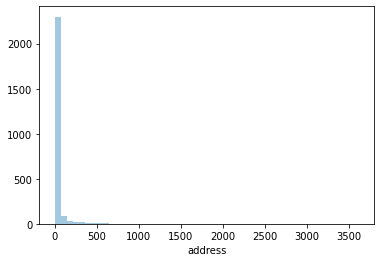

In [131]:
sns.distplot(df['address'].value_counts(), kde=False)

Как видно большинство событий не проходит в одних местах часто. Поэтому посмотрим на самые популярные

In [132]:
df['address'].value_counts()[df['address'].value_counts() > 1000]

Россия, Москва    Москва, -                              3623
Россия, по назначению, -                                 3607
Россия, Московская обл.    Новогорск, УТЦ "Новогорск"    2762
Россия, Московская обл.    Лобня, РОЦ "Оз. Круглое"      1730
Россия, Санкт-Петербург    Санкт-Петербург, -            1353
Россия, Москва, -                                        1328
Италия, -, -                                             1189
Германия, -, -                                           1145
Name: address, dtype: int64

Посмотрим распеделение количества участников по мероприятиям

In [187]:
list_sp = ['Россия, Москва    Москва, -', 'Россия, по назначению, -', 'Россия, Московская обл.    Новогорск, УТЦ "Новогорск"', 'Россия, Московская обл.    Лобня, РОЦ "Оз. Круглое"', 'Россия, Санкт-Петербург    Санкт-Петербург, -', 'Россия, Москва, -', 'Италия, -, -', 'Германия, -, -'] 

In [188]:
sub_df_1 = df[df['address'] == 'Россия, Москва    Москва, -']
sub_df_2 = df[df['address'] == 'Россия, по назначению, -']
sub_df_3 = df[df['address'] == 'Россия, Московская обл.    Новогорск, УТЦ "Новогорск"']
sub_df_4 = df[df['address'] == 'Россия, Московская обл.    Лобня, РОЦ "Оз. Круглое"']
sub_df_5 = df[df['address'] == 'Россия, Санкт-Петербург    Санкт-Петербург, -']
sub_df_6 = df[df['address'] == 'Россия, Москва, -']
sub_df_7 = df[df['address'] == 'Италия, -, -']
sub_df_8 = df[df['address'] == 'Германия, -, -']
sub_df = pd.concat([sub_df_1, sub_df_2, sub_df_3, sub_df_4, sub_df_5, sub_df_6, sub_df_7, sub_df_8])

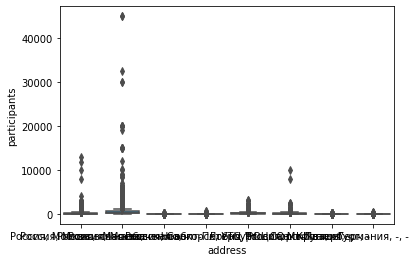

In [189]:
sns.boxplot(x="address", y="participants", data=sub_df, palette='rainbow');

Мы видим, что в Москве есть площадки на которых можно проводить действительно большие мероприятия. Удивляет, что есть огромное число выбросов, которое автор объяснить не может

In [193]:
contingency = pd.crosstab(sub_df['section'], sub_df['address'])
contingency['sum'] = contingency[list_sp[0]] + contingency[list_sp[1]]+contingency[list_sp[2]] + contingency[list_sp[3]] + contingency[list_sp[4]]+contingency[list_sp[5]] +  contingency[list_sp[6]] +  contingency[list_sp[7]]
contingency = contingency[contingency['sum'] > 300]
contingency

address,"Германия, -, -","Италия, -, -","Россия, Москва Москва, -","Россия, Москва, -","Россия, Московская обл. Лобня, РОЦ ""Оз. Круглое""","Россия, Московская обл. Новогорск, УТЦ ""Новогорск""","Россия, Санкт-Петербург Санкт-Петербург, -","Россия, по назначению, -",sum
section,,,,,,,,,
Автомобильный спорт,37,34,23,2,0,0,23,241,360
Баскетбол,3,20,120,43,0,146,12,194,538
Волейбол,11,23,84,40,0,129,0,159,446
Конный спорт,120,18,52,24,0,0,5,87,306
Плавание,1,38,11,5,213,0,10,34,312
Спорт лиц с поражением ОДА,64,49,215,57,55,36,30,27,533
Спортивная гимнастика,11,9,9,5,253,0,4,19,310
Теннис,14,58,221,77,0,0,15,34,419
Фехтование,73,60,54,13,685,316,20,32,1253


<AxesSubplot:xlabel='address', ylabel='section'>

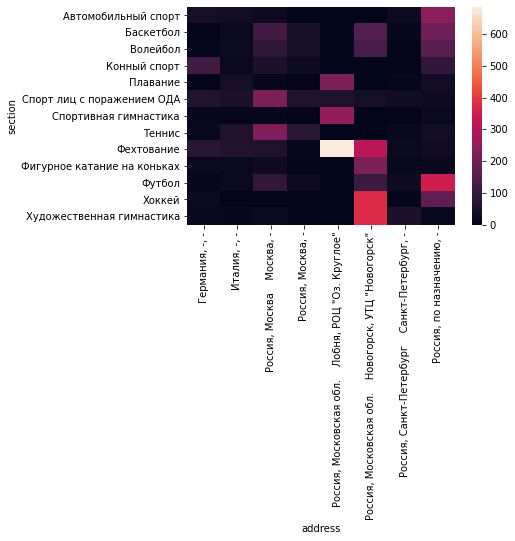

In [194]:
sns.heatmap(contingency.drop('sum',axis=1))

На основе этих данных мы можем предположить, что база фехтования расположена в Россия, Московская обл.    Лобня, РОЦ "Оз. Круглое"

#### Тип соревнования

In [136]:
df['title'].value_counts()

Учебно-тренировочный сбор                         10708
Всероссийские соревнования                        10036
Тренировочное мероприятие                          9613
Международные соревнования                         8992
Чемпионат россии                                   5615
                                                  ...  
Тм, чемпионат европы, кубок европы                    1
Утс, первенство мира, кубок мира                      1
Тм, чемпионат мира, международные соревнвоания        1
Тм, чемпионат европы, международные                   1
Спартакиада молодежи россии                           1
Name: title, Length: 172, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='title'>

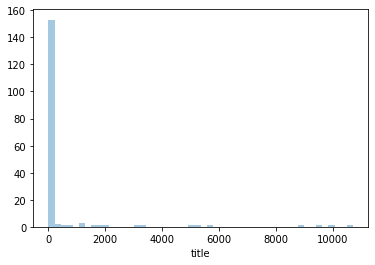

In [137]:
sns.distplot(df['title'].value_counts(), kde=False)

In [138]:
df['title'].value_counts()[df['title'].value_counts() > 4000]

Учебно-тренировочный сбор     10708
Всероссийские соревнования    10036
Тренировочное мероприятие      9613
Международные соревнования     8992
Чемпионат россии               5615
Первенство россии              5270
Кубок россии                   5023
Name: title, dtype: int64

In [139]:
sub_df_1 = df[df['title'] == 'Учебно-тренировочный сбор']
sub_df_2 = df[df['title'] == 'Всероссийские соревнования']
sub_df_3 = df[df['title'] == 'Тренировочное мероприятие']
sub_df_4 = df[df['title'] == 'Международные соревнования']
sub_df_5 = df[df['title'] == 'Чемпионат россии']
sub_df_6 = df[df['title'] == 'Первенство россии']
sub_df_7 = df[df['title'] == 'Кубок россии']
sub_df = pd.concat([sub_df_1, sub_df_2, sub_df_3, sub_df_4, sub_df_5, sub_df_6, sub_df_7])

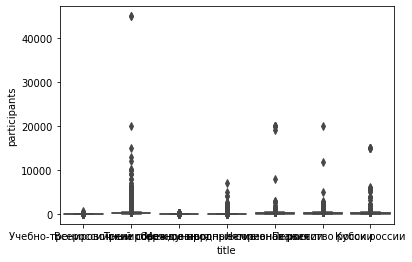

In [140]:
sns.boxplot(x="title", y="participants", data=sub_df, palette='rainbow');

Наблюдается большое количество выбросов. Максимум на Всероссийских соревнованиях. 

In [179]:
contingency = pd.crosstab(sub_df['section'], sub_df['title'])
# contingency.columns.values
contingency['sum'] = contingency['Учебно-тренировочный сбор'] + contingency['Всероссийские соревнования']+contingency['Тренировочное мероприятие'] + contingency['Международные соревнования'] + contingency['Чемпионат россии']+contingency['Первенство россии'] +  contingency['Кубок россии']
contingency = contingency[contingency['sum'] > 500]

title,Всероссийские соревнования,Кубок россии,Международные соревнования,Первенство россии,Тренировочное мероприятие,Учебно-тренировочный сбор,Чемпионат россии,sum
section,,,,,,,,
Авиамодельный спорт,88,444,19,79,19,38,85,772
Автомобильный спорт,538,640,29,305,1,1,546,2060
Бадминтон,16,8,461,24,51,56,15,631
Баскетбол,121,39,240,96,220,234,40,990
Биатлон,131,71,5,96,225,242,52,822
Бокс,334,6,316,40,220,207,16,1139
Велоспорт-маунтинбайк,121,123,12,87,34,77,60,514
Велоспорт-шоссе,444,20,188,320,88,117,152,1329
Водное поло,12,24,184,84,149,177,34,664


<AxesSubplot:xlabel='title', ylabel='section'>

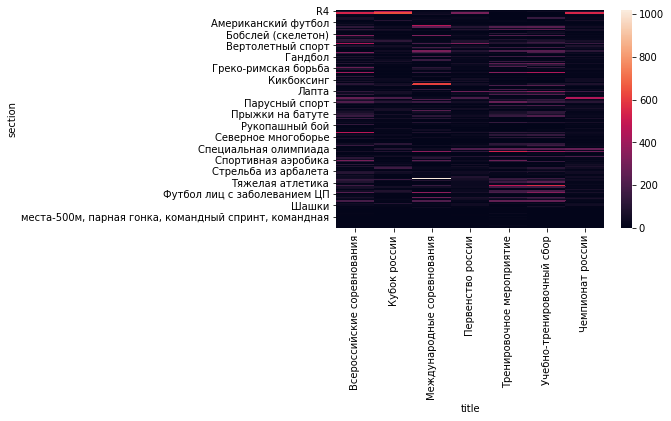

In [182]:
sns.heatmap(contingency.drop('sum',axis=1))

На основе этих данных можно предположить, что по тяжелой атлетике проводится больше всего международных соревнований

#### Описание соревнований

In [183]:
df['description'].value_counts()

-                                                       18219
вольная борьба                                            675
шпага                                                     632
рапира                                                    573
пляжный                                                   523
                                                        ...  
точность приземления - личная, групповая                    1
по положению о соревнвоаниях                                1
кросс-кантри, гонка с выбыванием                            1
кросс «Д3-250»  2 этап                                      1
трофи-рейд "ТР1", "ТР2", "ТР3", "абсолютный"  6 этап        1
Name: description, Length: 9574, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='description'>

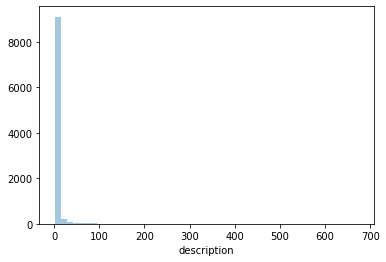

In [195]:
sns.distplot(df['description'].value_counts()[1:], kde=False)

Описания почти все разные, смысла искать в этом что-то нету.